In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [2]:
'''A bit of constants.'''

cmtoev = 1.98e-5

gtoev = 5.62e32

stoev = 1/(6.58e-16)

In [3]:
df = pd.read_csv('datafromabsorption.csv',sep=';',header=None)

dataset_menos = pd.read_csv("Default Dataset (3).csv", sep=';',header=None)

transmitance = pd.read_csv('transmittancedata.csv', sep=";", header=None)

novo = pd.read_csv('dataset4.csv', sep=';', header=None)

data1 = pd.read_csv('data1.csv', sep=';', header=None)

data2 = pd.read_csv('data2.csv', sep=';', header=None)

data1_new, data2_new = data1*cmtoev, data2*cmtoev

df_new = df*cmtoev

dataset_new = dataset_menos*cmtoev

novo_modificado = novo*cmtoev

data1_new

data1

,0,1
0,661.430074,2909.695332
1,664.199719,2714.522643
2,665.187273,3489.518773
3,664.199719,3180.391076
4,666.423782,4040.706060
...,...,...
100,1589.345789,1236.364768
101,1594.667691,1157.404980
102,1592.004516,1079.028071
103,1605.365015,975.986302


In [4]:
l = 0.0203544

absoportion_1 = [-np.log(transmitance.iloc[x,1])/(l*0.035) for x in range(len(transmitance))]

transmitance.iloc[:,1] = absoportion_1

transmitance_new = transmitance*cmtoev

juntando = pd.concat([transmitance_new.iloc[:258,:258],novo_modificado])

juntando.to_csv('dados_juntos.csv', sep=';', index=False, header=False)




In [5]:
dados = pd.read_csv('dados_juntos.csv', sep=';', header=None)
dados


lista1 = [dados.iloc[x,0] for x in range(len(dados))]
sorting = sorted(lista1)

for i in range(len(sorting)):
    dados.iloc[i,0] = sorting[i]

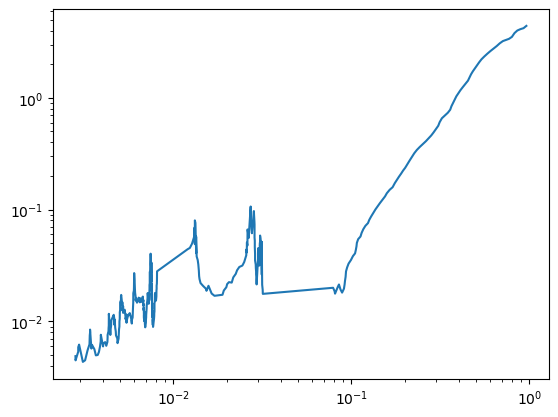

In [6]:
plt.plot(dados[0],dados[1])
plt.xscale('log')
plt.yscale('log')
#plt.xlim(600,5e4)


In [7]:
#Vou colocar alguns dados numéricos aqui:
n = 1*(cmtoev*1e7)**3#atomos/cm3
rho = 3* gtoev * (cmtoev)**3#g/cm3
rho_dm = 0.3e9 *(cmtoev)**3 #ev/cm3
year = 3.156e7*stoev
v = 1e-3
c = 3e8
kg = gtoev*1e3
day = 86400*stoev
concentration = 1e-5 #mol/L

In [8]:
def kappa(m, alpha):
    sensitivity = 1/(kg*year)
    ratio = (rho*m)/(rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))

def kappa2(m, alpha):
    sensitivity = 1/(kg*day)
    ratio = (rho*m)/(rho_dm*alpha)
    return (np.sqrt((sensitivity*ratio)))

In [9]:
kappa(data1_new.iloc[27,0],data1_new.iloc[27,1])

1.452340095503696e-17

In [10]:
interpolation = interp1d(dados.iloc[:,0],dados.iloc[:,1], kind='linear', fill_value="extrapolate")

graphkgyear = [kappa(dados.iloc[x,0],dados.iloc[x,1]) for x in range(len(dados))]
graphkgday = [kappa2(dados.iloc[x,0],dados.iloc[x,1]) for x in range(len(dados))]

len(graphkgday)

457

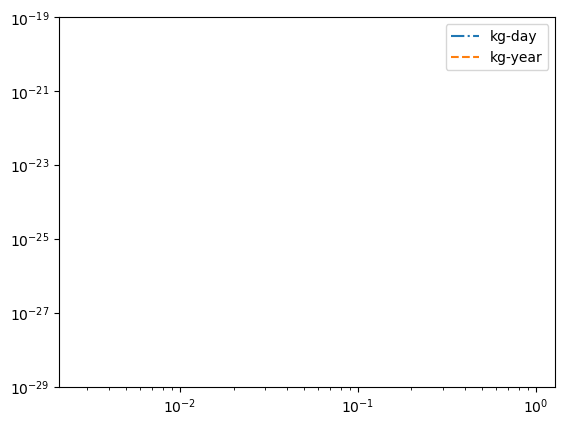

In [ ]:
plt.plot(dados[0],graphkgday, linestyle='dashdot', label='kg-day')
plt.plot(dados[0],graphkgyear, linestyle='--', label='kg-year')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-29,1e-19)
#plt.xlim(1e-3,10)
plt.legend()
#plt.savefig('plottt.pdf', format='pdf')

In [12]:
#I want to try and interpolate separetly.

fit1 = np.polyfit(data1_new.iloc[:,0], data1_new.iloc[:,1], 1)

fit2 = np.polyfit(data2_new.iloc[:,0], data2_new.iloc[:,1], 3)

fit3 = np.polyfit(transmitance_new.iloc[:,0], transmitance_new.iloc[:,1],2)

funcao1 = np.poly1d(fit1)

funcao2 = np.poly1d(fit2)

funcao3 = np.poly1d(fit3)

lista_plot1 = [funcao1(data1_new.iloc[x,0]) for x in range(len(data1_new))]

lista_plot2 = [funcao2(data2_new.iloc[x,0]) for x in range(len(data2_new))]

lista_plot3 = [funcao2(transmitance_new.iloc[x,0]) for x in range(len(transmitance_new))]

lista_plot4 = lista_plot3 + lista_plot1 + lista_plot2 

xaxis = [transmitance_new.iloc[x,0] for x in range(len(transmitance_new))] + [data1_new.iloc[x,0] for x in range(len(data1_new))] + [data2_new.iloc[x,0] for x in range(len(data2_new))]

#plt.plot(data1_new.iloc[:,0], lista_plot1)
#plt.plot(data2_new.iloc[:,0], lista_plot2)
#plt.plot(transmitance_new.iloc[:,0], lista_plot3)
#plt.plot(xaxis, lista_plot4)

#plt.xscale('log')
#plt.yscale('log')



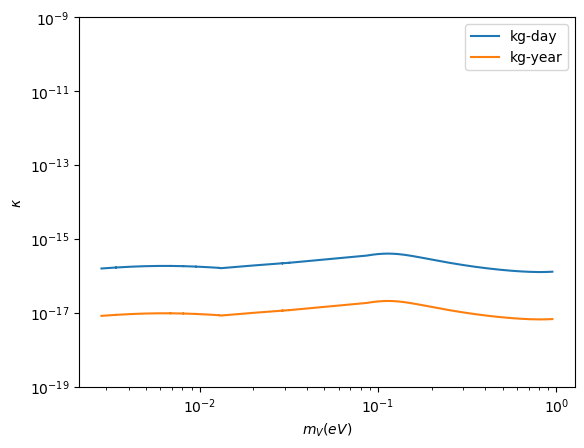

In [13]:
graphkgyear1 = [kappa(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgyear2 = [kappa(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgyear3 = [kappa(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph = [kappa(xaxis[x], lista_plot4[x]) for x in range(len(xaxis))]
graph2 = graphkgyear3 + graphkgyear1 + graphkgyear2

graphkgday1 = [kappa2(data1_new.iloc[x,0],funcao1(data1_new.iloc[x,0])) for x in range(len(data1_new))] 
graphkgday2 = [kappa2(data2_new.iloc[x,0],funcao2(data2_new.iloc[x,0])) for x in range(len(data2_new))]
graphkgday3 = [kappa2(transmitance_new.iloc[x,0],funcao3(transmitance_new.iloc[x,0])) for x in range(len(transmitance_new))]
graph3 = graphkgday3 + graphkgday1 + graphkgday2

#plt.plot(data1_new.iloc[:,0], graphkgyear1)
#plt.plot(data2_new.iloc[:,0], graphkgyear2)
#plt.plot(transmitance_new.iloc[:,0], graphkgyear3)
plt.plot(xaxis, graph3, label='kg-day')
plt.plot(xaxis, graph2, label = 'kg-year')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\kappa$')
plt.xlabel('$m_V(eV)$')
plt.ylim(1e-19, 1e-9)
plt.legend()

In [14]:
dataDY = pd.read_csv('dataDY.csv', sep =';', header=None)
dataDY.iloc[:,0] = 1/(dataDY.iloc[:,0])
dataDY.iloc[:,1] = dataDY.iloc[:,1]*1e3*concentration
dataDY = dataDY*cmtoev
'''I have to look for the actual meaning of M^-1. If I do multiply by the concentration, the order of magnitude in cm^-1 of 
the absorption is very different than the one in the other papers. This difference in order of magnitude is important, because
it causes a shift of 3 orders in the mixing angle.'''

dataDY

,0,1
0,0.932705,4.885154e-06
1,0.922554,4.517229e-06
2,0.912622,4.238429e-06
3,0.902028,3.941347e-06
4,0.891677,3.735675e-06
...,...,...
114,0.427393,7.922771e-07
115,0.424668,7.922771e-07
116,0.421977,7.877066e-07
117,0.419698,7.877066e-07


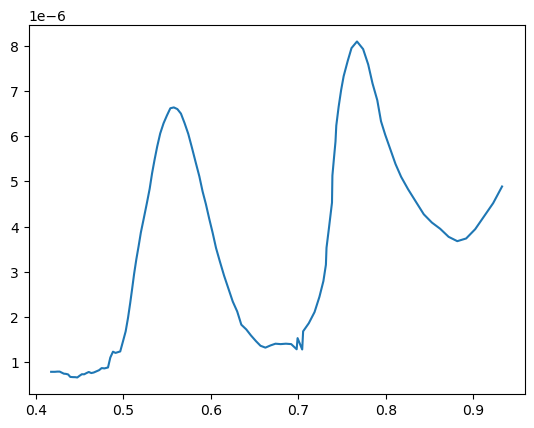

In [15]:
plt.plot(dataDY.iloc[:,0], dataDY.iloc[:,1])

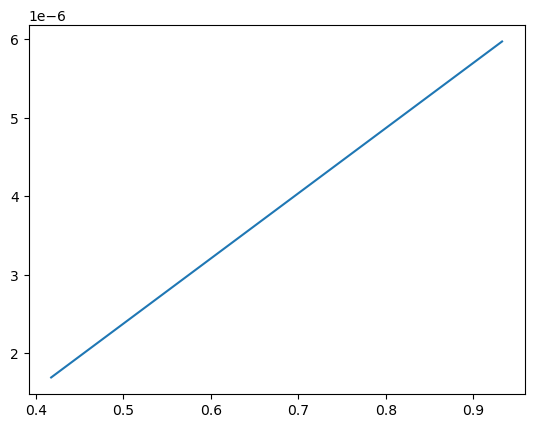

In [23]:
fit4 = np.polyfit(dataDY.iloc[:,0], dataDY.iloc[:,1],1)

func4 = np.poly1d(fit4)
lista_plot5 = [func4(dataDY.iloc[x,0]) for x in range(len(dataDY))]

plt.plot(dataDY.iloc[:,0], lista_plot5)

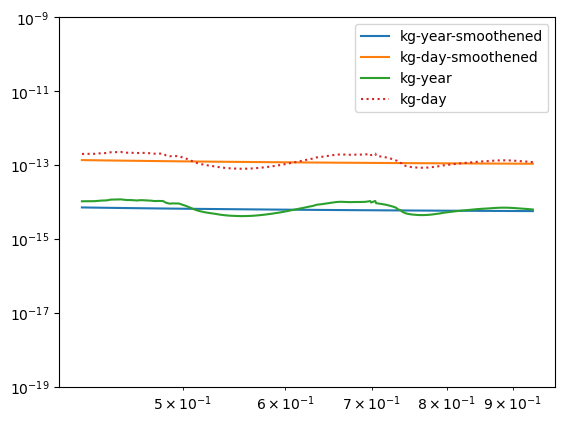

In [24]:
#Curva para Dy2(dbm)4(OQ)2(CH3OH)2

graphkgyear4_smooth = [kappa(dataDY.iloc[x,0], func4(dataDY.iloc[x,0])) for x in range(len(dataDY))]

graphkgday4_smooth = [kappa2(dataDY.iloc[x,0], func4(dataDY.iloc[x,0])) for x in range(len(dataDY))]

graphkgyear4 = [kappa(dataDY.iloc[x,0], dataDY.iloc[x,1]) for x in range(len(dataDY))]
graphkgday4 = [kappa2(dataDY.iloc[x,0], dataDY.iloc[x,1]) for x in range(len(dataDY))]
plt.plot(dataDY.iloc[:,0], graphkgyear4_smooth, label='kg-year-smoothened')
plt.plot(dataDY.iloc[:,0], graphkgday4_smooth, label='kg-day-smoothened')
plt.plot(dataDY.iloc[:,0], graphkgyear4, label='kg-year', linestyle='-')
plt.plot(dataDY.iloc[:,0], graphkgday4, label='kg-day', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19, 1e-9)
#plt.xlim(1e-1,10e-1)
plt.legend()

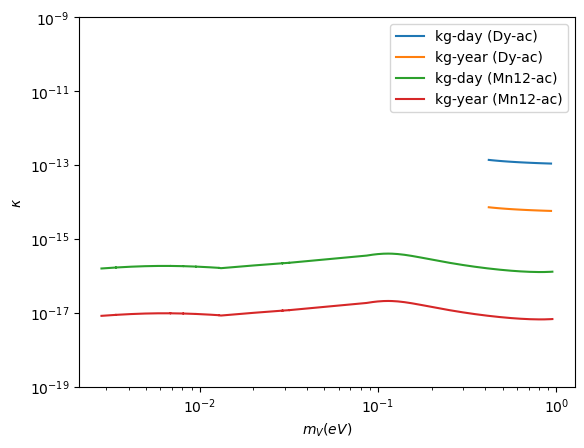

In [26]:
plt.plot(dataDY.iloc[:,0], graphkgday4_smooth, label='kg-day (Dy-ac)')
plt.plot(dataDY.iloc[:,0], graphkgyear4_smooth, label='kg-year (Dy-ac)')
#plt.plot(dataDY.iloc[:,0], graphkgyear4, label='kg-year', linestyle='-')
#plt.plot(dataDY.iloc[:,0], graphkgday4, label='kg-day', linestyle=':')
plt.plot(xaxis, graph3, label='kg-day (Mn12-ac)')
plt.plot(xaxis, graph2, label = 'kg-year (Mn12-ac)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\kappa$')
plt.xlabel('$m_V(eV)$')
plt.ylim(1e-19, 1e-9)
plt.legend()
#plt.savefig('plot.pdf', format='pdf')